In [22]:
#%matplotlib inline

import pystan
import matplotlib.pyplot as plt
import numpy as np

# Linear Regression Example
## Following STAN docs
### Generate some data

[88 10 47 74 10 93 39 47 67 18]


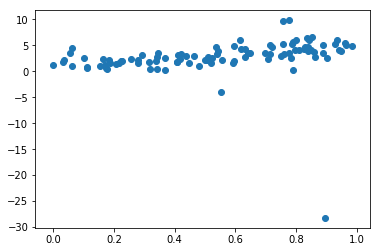

In [23]:
npts = 100
x = np.random.rand(npts)
m = 3.3
c = 1.2
s = 1.1
e = np.random.randn(npts) * s
y = m*x + c + e
sel = np.random.randint(0,npts-1, 10)
print(sel)
y[sel] *= np.random.randn(len(sel))*3

fig, ax = plt.subplots()
ax.scatter(x, y)

dat = {'N': npts,
      'y': y,
      'x': x}

### Setup the STAN model

In [20]:
lin_code = '''
data {
    int<lower = 0> N;
    vector[N] x;
    vector[N] y;
    
}
parameters {
    real alpha;
    real beta;
    real<lower = 0> sigma;
    real<lower = 0> nu;
}
model {
    y ~ student_t(nu, alpha + beta * x, sigma);
}
'''
sm = pystan.StanModel(model_code=lin_code, model_name='RobustLinReg')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL RobustLinReg_fe5d0ea20e8fd5312d4e2c499adb73b3 NOW.


### Now do the sampling

/usr/local/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


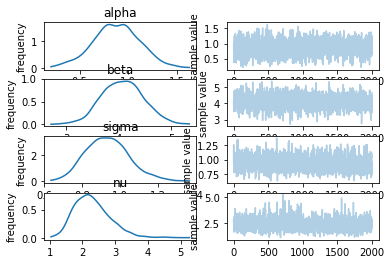

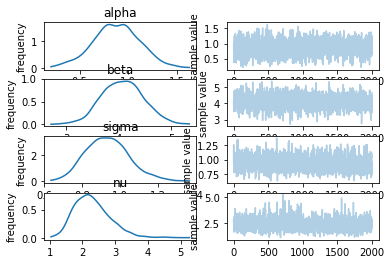

In [24]:
fit = sm.sampling(data=dat, iter=1000, chains=4)
fit.plot()

In [25]:
print(fit)

Inference for Stan model: RobustLinReg_fe5d0ea20e8fd5312d4e2c499adb73b3.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha   0.88  7.5e-3   0.24    0.4   0.72   0.88   1.04   1.33    985    1.0
beta    4.08    0.01    0.4   3.31   3.79   4.08   4.35   4.88    975    1.0
sigma   0.93  3.2e-3   0.11   0.73   0.85   0.93   1.01   1.18   1296    1.0
nu       2.3    0.02   0.55   1.44   1.91   2.24   2.62    3.5   1234    1.0
lp__  -126.2    0.05   1.34 -129.6 -126.9 -125.9 -125.2 -124.5    783    1.0

Samples were drawn using NUTS at Wed Feb 14 11:18:12 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [26]:
print(fit['alpha'].mean())

0.880167714576402


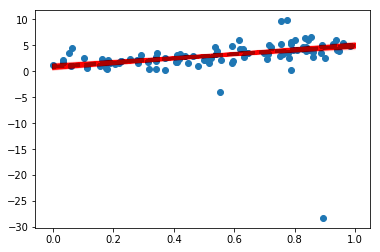

In [27]:
fig, ax = plt.subplots()
ax.scatter(x, y)
xx = np.linspace(0,1,100)
ax.plot(xx, fit['alpha'].mean() + fit['beta'].mean() * xx, 'k--', lw=3)
a = fit['alpha']
b = fit['beta']
for i in range(len(a)):
    ax.plot(xx, a[i] + b[i]*xx, 'r-', alpha=0.01)